# PREDICTING HOMELESSNESS IN AMERICA


In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style="whitegrid")
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm
from statsmodels.formula.api import ols
import scipy.stats as stats

## Exploratory Data Analysis

In [2]:
df = pd.read_csv('data/merged_data_set.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3157 entries, 0 to 3156
Data columns (total 34 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Unnamed: 0                  3157 non-null   int64  
 1   state                       3157 non-null   object 
 2   number                      3157 non-null   object 
 3   year                        3157 non-null   int64  
 4   population                  3157 non-null   float64
 5   renter-occupied-households  3157 non-null   float64
 6   eviction-filings            3157 non-null   float64
 7   evictions                   3157 non-null   float64
 8   total_ssi                   3157 non-null   int64  
 9   aged_ssi                    3157 non-null   int64  
 10  disbl_ssi                   3157 non-null   int64  
 11  18_und_ssi                  3157 non-null   int64  
 12  18_64_ssi                   3157 non-null   int64  
 13  65_ovr_ssi                  3157 

In [4]:
df.head()

,Unnamed: 0,state,number,year,population,renter-occupied-households,eviction-filings,evictions,total_ssi,aged_ssi,...,pct-af-am,pct-hispanic,pct-am-ind,pct-asian,pct-nh-pi,pct-multiple,pct-other,num,homeless_count,yr
0,0,alabama,AL-500,2007,845208.0,104742.0,3203.0,656.0,25480,1839,...,25.145,3.43,0.195,1.435,0.030,0.770,0.120,AL-500,2104.0,2007
1,1,alabama,AL-500,2008,845208.0,105612.0,2172.0,976.0,25762,1722,...,25.145,3.43,0.195,1.435,0.030,0.770,0.120,AL-500,2104.0,2008
2,2,alabama,AL-500,2009,845208.0,106482.0,1785.0,945.0,26244,1615,...,25.145,3.43,0.195,1.435,0.030,0.770,0.120,AL-500,2273.0,2009
3,3,alabama,AL-500,2010,853551.0,107353.0,2486.0,1605.0,27098,1525,...,26.200,4.90,0.225,1.640,0.025,0.990,0.105,AL-500,2273.0,2010
4,4,alabama,AL-500,2011,862556.0,108846.0,3708.0,2257.0,27532,1459,...,26.950,4.82,0.230,1.800,0.025,1.105,0.165,AL-500,1950.0,2011


In [5]:
df.columns

Index(['Unnamed: 0', 'state', 'number', 'year', 'population',
       'renter-occupied-households', 'eviction-filings', 'evictions',
       'total_ssi', 'aged_ssi', 'disbl_ssi', '18_und_ssi', '18_64_ssi',
       '65_ovr_ssi', 'poverty-rate', 'median-gross-rent',
       'median-household-income', 'median-property-value', 'rent-burden',
       'eviction-rate', 'eviction-filing-rate', 'unemploy_rate',
       'pct-renter-occupied', 'pct-white', 'pct-af-am', 'pct-hispanic',
       'pct-am-ind', 'pct-asian', 'pct-nh-pi', 'pct-multiple', 'pct-other',
       'num', 'homeless_count', 'yr'],
      dtype='object')

In [6]:
df.rename({'poverty-rate':'poverty_rate', 'renter-occupied-households':'renter_occupied_households',
          'pct-renter-occupied':'pct_renter_occupied','median-gross-rent':'median_gross_rent', 'median-household-income':'median_household_income',
           'median-property-value':'median_property_value','rent-burden':'avg_rent_burden',
           'pct-white':'pct_white', 'pct-af-am':'pct_af_am', 'pct-hispanic':'pct_hispanic',
           'pct-am-ind':'pct_am_ind','pct-asian':'pct_asian', 'pct-nh-pi':'pct_nh_pi', 
           'pct-multiple': 'pct_multiple', 'pct-other':'pct_other','eviction-filings':'eviction_filings','eviction-rate':'eviction_rate',
           'eviction-filing-rate': 'eviction_filing_rate'}, axis=1, inplace=True)

In [7]:
df.drop(['Unnamed: 0','num','yr'], axis=1, inplace=True)

In [8]:
pd.set_option('display.max_columns', 100)
df.describe()

,year,population,renter_occupied_households,eviction_filings,evictions,total_ssi,aged_ssi,disbl_ssi,18_und_ssi,18_64_ssi,65_ovr_ssi,poverty_rate,median_gross_rent,median_household_income,median_property_value,avg_rent_burden,eviction_rate,eviction_filing_rate,unemploy_rate,pct_renter_occupied,pct_white,pct_af_am,pct_hispanic,pct_am_ind,pct_asian,pct_nh_pi,pct_multiple,pct_other,homeless_count
count,3157.000000,3.157000e+03,3.157000e+03,3157.000000,3157.000000,3.157000e+03,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,2652.000000,2709.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000,3157.000000
mean,2011.561609,1.133319e+06,1.604497e+05,8130.104846,2790.368071,2.874804e+04,4535.561926,24109.090909,4188.866012,16543.141590,7999.343364,10.207520,862.082436,55318.655623,213638.198333,30.229545,2.506533,5.842634,7.123237,32.099638,72.249196,9.481370,11.508706,0.837831,3.594905,0.100130,2.048753,0.178996,1548.975610
std,2.870199,2.685035e+06,4.732926e+05,31017.259646,6859.976926,8.161966e+04,18770.904877,63791.956530,10614.063139,41290.193028,31613.717836,3.971800,259.411250,15278.970082,133574.406944,2.740652,2.332347,7.893657,2.799745,8.521690,17.843141,10.590134,12.902517,1.907531,4.651623,0.189632,1.119248,0.206276,4246.236415
min,2007.000000,2.963100e+04,2.696000e+03,0.000000,0.000000,2.850000e+02,12.000000,270.000000,32.000000,217.000000,29.000000,1.430000,430.923077,30511.750000,61525.000000,21.164151,0.000000,0.000000,1.950000,12.560000,12.590000,0.210909,0.590000,0.020000,0.040000,0.000000,0.575000,0.000000,7.000000
25%,2009.000000,2.478300e+05,3.174600e+04,272.000000,80.000000,5.073000e+03,407.000000,4560.000000,754.000000,3259.000000,894.000000,7.437500,668.985294,44369.000000,119950.000000,28.600000,0.942500,1.590000,5.110000,26.040000,62.335000,2.161818,3.305000,0.156667,0.791000,0.018261,1.357170,0.070000,313.000000
50%,2012.000000,5.065290e+05,6.160300e+04,1842.000000,930.000000,1.027600e+04,935.000000,9063.000000,1600.000000,6452.000000,1933.000000,9.748462,794.000000,50747.000000,167400.000000,30.100000,1.830000,3.560000,6.665500,30.440000,76.030000,5.560000,6.340000,0.260000,2.010000,0.030000,1.760000,0.126667,676.000000
75%,2014.000000,1.010790e+06,1.338320e+05,6020.000000,2892.000000,2.481400e+04,2462.000000,21346.000000,3639.000000,15336.000000,5250.000000,13.000000,999.000000,62117.000000,263700.000000,31.900000,3.380000,7.530000,8.630000,37.180000,86.845000,13.340000,14.030000,0.560000,4.320000,0.090000,2.370000,0.210000,1475.000000
max,2016.000000,3.530385e+07,5.734557e+06,575012.000000,118676.000000,1.049300e+06,250118.000000,805762.000000,132525.000000,483498.000000,438722.000000,23.730833,1827.000000,123453.000000,880000.000000,43.600000,17.150000,118.620000,29.010000,70.699091,97.850000,63.520000,82.200000,18.214444,33.530000,1.500000,9.686000,2.350000,75323.000000


### Check for outliers

In [9]:
df.columns #change data types and round percentage pts

Index(['state', 'number', 'year', 'population', 'renter_occupied_households',
       'eviction_filings', 'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi',
       '18_und_ssi', '18_64_ssi', '65_ovr_ssi', 'poverty_rate',
       'median_gross_rent', 'median_household_income', 'median_property_value',
       'avg_rent_burden', 'eviction_rate', 'eviction_filing_rate',
       'unemploy_rate', 'pct_renter_occupied', 'pct_white', 'pct_af_am',
       'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple',
       'pct_other', 'homeless_count'],
      dtype='object')

Text(0.5, 1.0, 'HOMELESS PER COC')

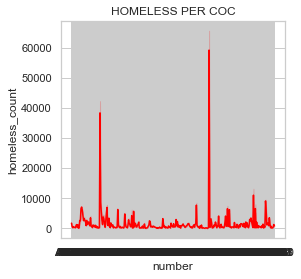

In [10]:
fig = plt.figure(figsize=(4,4))
sns.set(style="whitegrid")
sns.lineplot(x = df['number'], y = df['homeless_count'], color ='red' ).set_title('HOMELESS PER COC')

[Text(0, 0, '0'),
 Text(0, 0, '10K'),
 Text(0, 0, '20K'),
 Text(0, 0, '30K'),
 Text(0, 0, '40K'),
 Text(0, 0, '50K'),
 Text(0, 0, '60K'),
 Text(0, 0, '70K'),
 Text(0, 0, '80K')]

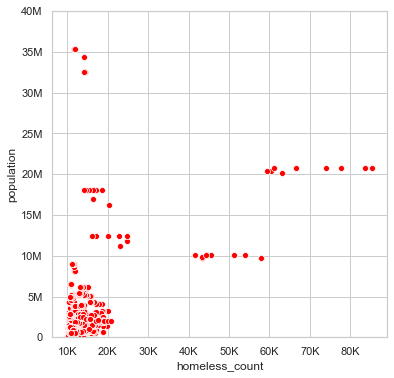

In [43]:
fig = plt.figure(figsize=(6,6))
ax = sns.scatterplot(x= df['homeless_count'], y= df['population'], color='red')
plt.ylim(top = 40000000, bottom = 0)
ax.set_yticklabels(['0','5M','10M','15M','20M','25M', '30M','35M','40M'])
ax.set_xticklabels(['0','10K','20K','30K','40K','50K', '60K','70K','80K'])

In [54]:
df[df.homeless_count >= 20000].number.unique() #determine outliers and remove

array(['CA-600', 'NY-600'], dtype=object)

In [61]:
df[df.population >= 5000000].number.unique()

array(['CA-600', 'CA-603', 'IL-511', 'IN-502', 'MD-505', 'NY-600',
       'NC-503', 'OH-507', 'TX-607', 'TX-700', 'VA-601'], dtype=object)

In [14]:
#cap the homeless counts and populations in order to keep the data 

In [62]:
df.homeless_count = [20000 if x > 20000 else x for x in df.homeless_count]
df.population = [5000000 if x > 5000000 else x for x in df.population]

In [85]:
df.isna().sum()

state                         0
number                        0
year                          0
population                    0
renter_occupied_households    0
eviction_filings              0
evictions                     0
total_ssi                     0
aged_ssi                      0
disbl_ssi                     0
18_und_ssi                    0
18_64_ssi                     0
65_ovr_ssi                    0
poverty_rate                  0
median_gross_rent             0
median_household_income       0
median_property_value         0
avg_rent_burden               0
eviction_rate                 0
eviction_filing_rate          0
unemploy_rate                 0
pct_renter_occupied           0
pct_white                     0
pct_af_am                     0
pct_hispanic                  0
pct_am_ind                    0
pct_asian                     0
pct_nh_pi                     0
pct_multiple                  0
pct_other                     0
homeless_count                0
dtype: i

In [16]:
print(df.eviction_rate.isna().value_counts())

False    2613
True      498
Name: eviction_rate, dtype: int64


In [17]:
#look at the distribution of the eviction rates

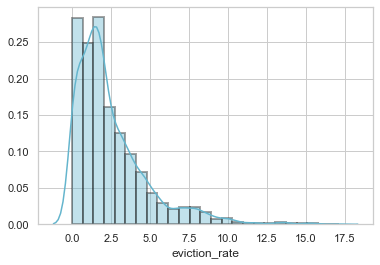

In [65]:
sns.distplot((df['eviction_rate']), bins=25, color='c',hist_kws= dict(edgecolor="k", linewidth=2))

In [66]:
df.eviction_rate.median()

1.83

In [67]:
df.eviction_rate = df.eviction_rate.fillna(1.83) #fill in missing data for eviction rate with median

In [68]:
print(df.eviction_filing_rate.isna().value_counts())

False    2709
True      448
Name: eviction_filing_rate, dtype: int64


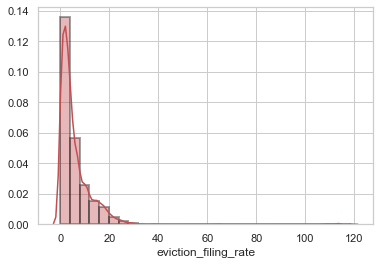

In [71]:
sns.distplot((df['eviction_filing_rate']), bins=30, color='r',hist_kws= dict(edgecolor="k", linewidth=2))

In [72]:
df.eviction_filing_rate.median()

3.56

In [73]:
df.eviction_filing_rate = df.eviction_filing_rate.fillna(3.56) 

In [74]:
whole_numbers = ['year', 'population', 'renter_occupied_households',
       'eviction_filings', 'evictions', 'total_ssi', 'aged_ssi', 'disbl_ssi',
       '18_und_ssi', '18_64_ssi', '65_ovr_ssi','homeless_count']

In [75]:
for num in whole_numbers:
    df[num]= df[num].astype(int)
    

In [76]:
floating_nums= ['poverty_rate','pct_renter_occupied', 'median_gross_rent',
                'median_household_income','median_property_value', 'avg_rent_burden', 
                'pct_white', 'pct_af_am','pct_hispanic', 'pct_am_ind', 'pct_asian',
                'pct_nh_pi', 'pct_multiple','pct_other', 'eviction_rate',
                'eviction_filing_rate', 'unemploy_rate']

In [77]:
for flo in floating_nums:
    df[flo] = df[flo].astype(float).round(2)

In [79]:
def no_infinite(x):
    if x <= 0:
        x = 0.0000000001
    return x

In [80]:
zero_mins= ['eviction_filings', 'evictions','pct_nh_pi','pct_other', 'eviction_rate', 'eviction_filing_rate']

In [81]:
for item in zero_mins:
    df[item] = df[item].apply(lambda x: no_infinite(x))

In [82]:
df.eviction_filings = df.eviction_filings.astype(int)

In [83]:
df.evictions = df.evictions.astype(int)

In [84]:
df.shape

(3157, 31)

In [86]:
df.to_csv('data/clean_data_set.csv')

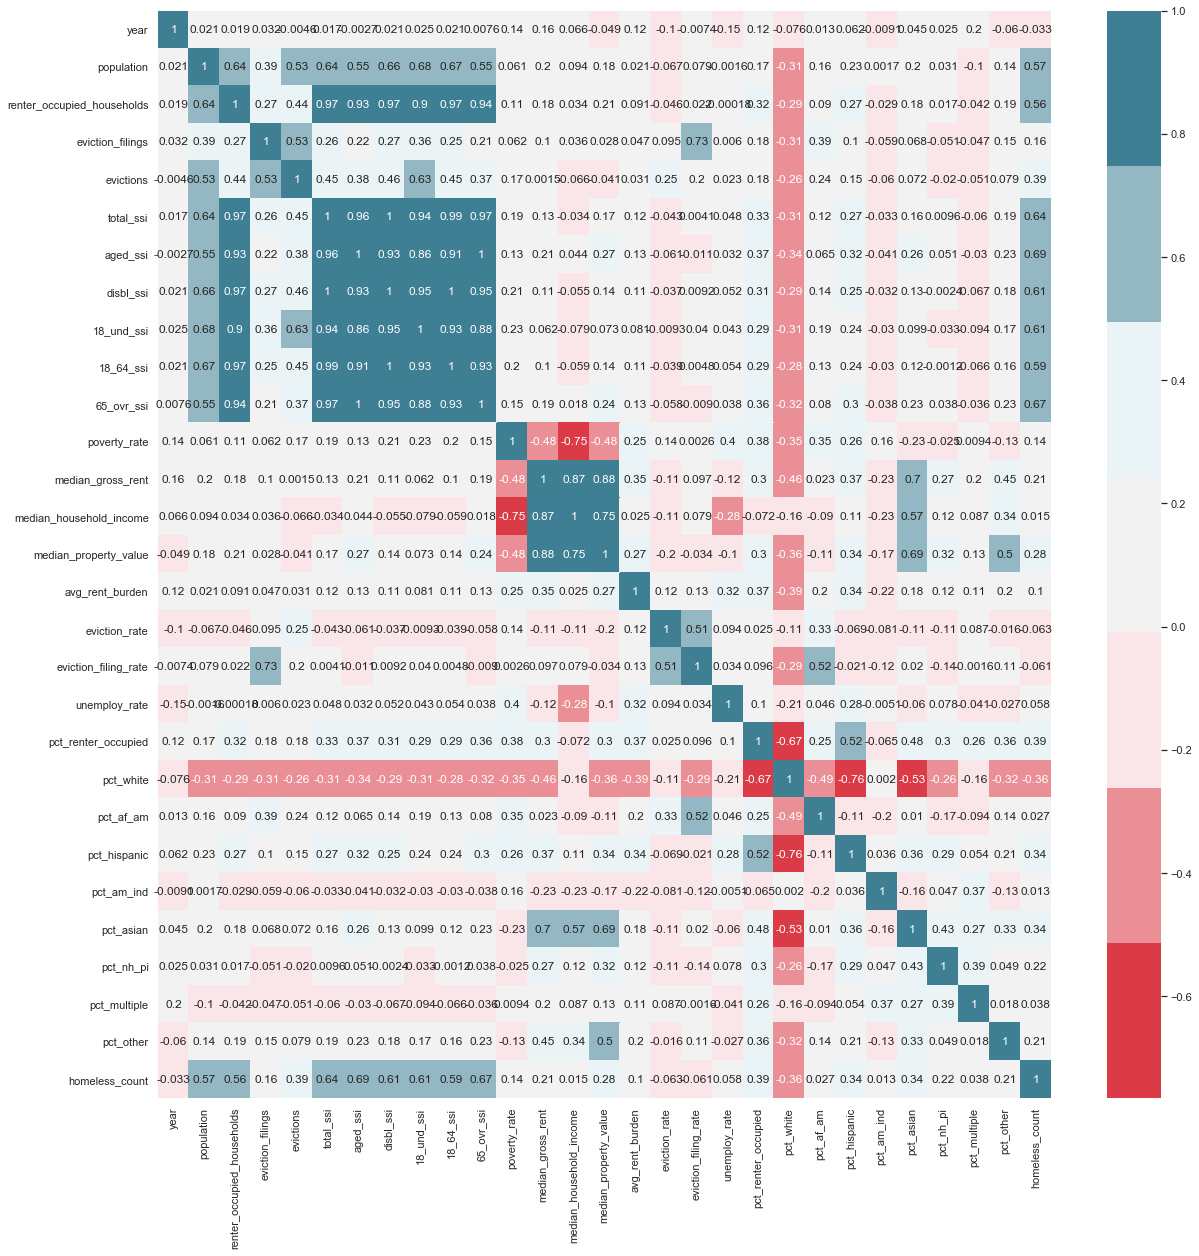

In [87]:
corr = df.corr()
fig, ax = plt.subplots(figsize=(20,20))

ax = sns.heatmap(corr, annot = True,cmap = sns.diverging_palette(10, 220, sep=80, n=7))

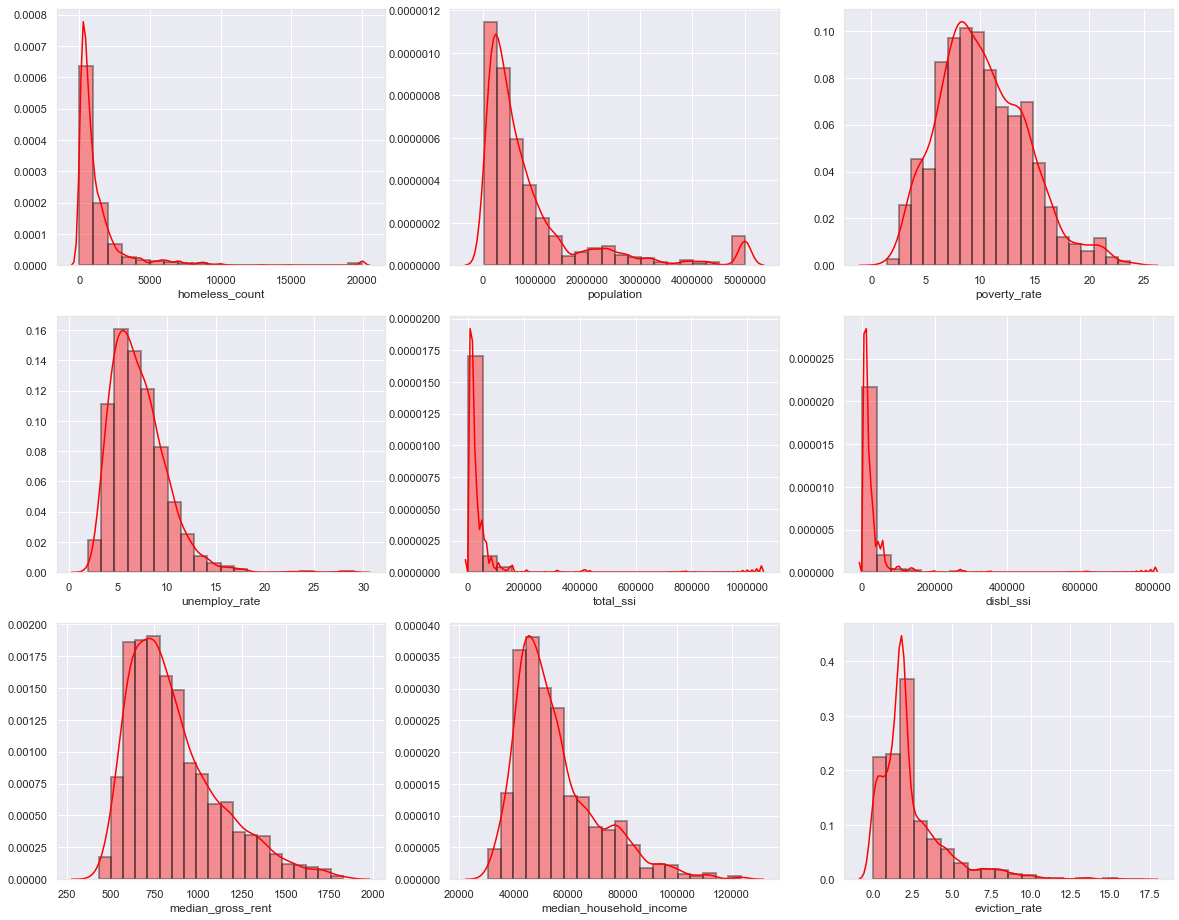

In [88]:
sns.set_style('darkgrid',{'axes.edgecolor': '.9'},)
f, ax = plt.subplots(3,3,figsize = (20,16))
plt.rcParams["patch.force_edgecolor"] = True

vis1 = sns.distplot(df["homeless_count"],bins=20, color='red',hist_kws=dict(edgecolor="k", linewidth=2),ax= ax[0][0])
vis2 = sns.distplot(df["population"],bins=20, color ='red',hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[0][1])
vis3 = sns.distplot(df["poverty_rate"],bins=20, color='red',hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[0][2])
vis4 = sns.distplot(df["unemploy_rate"],bins=20,color='red',hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[1][0])
vis5 = sns.distplot(df["total_ssi"],bins=20,color='red', hist_kws=dict(edgecolor="k", linewidth=2),ax=ax[1][1])
vis6 = sns.distplot(df["disbl_ssi"],bins=20, color='red',hist_kws=dict(edgecolor="k", linewidth=2), ax=ax[1][2])
vis7 = sns.distplot(df["median_gross_rent"],bins=20,color='red', hist_kws=dict(edgecolor="k", linewidth=2),ax=ax[2][0])
vis8 = sns.distplot(df["median_household_income"],bins=20,color='red', hist_kws=dict(edgecolor="k", linewidth=2),ax=ax[2][1])
vis9 = sns.distplot(df["eviction_rate"],bins=20,color='red', hist_kws=dict(edgecolor="k", linewidth=2),ax=ax[2][2])

## Initial Linear Regression Model

In [89]:
target = df['homeless_count']
features = df.drop(['homeless_count','number','state','year'], axis=1)
X_train, X_test, y_train, y_test = train_test_split(features, target, random_state= 27,test_size=0.2)

In [90]:
regr = linear_model.LinearRegression()

In [91]:
regr.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
y_train_pred = regr.predict(X_train)

In [93]:
y_test_pred = regr.predict(X_test)

In [95]:
print("Training R2: %.2f" % r2_score(y_train, y_train_pred))
print("Testing R2: %.2f" % r2_score(y_test, y_test_pred))

Training R2: 0.69
Testing R2: 0.76
